# Ejercicio 1
Aplicando la Transformada Z, y utilizando la propiedad de desplazamiento en el tiempo, determine la funcion de transferencia $H(z)$ de los siguientes sistemas LTI causales.

1. $y[n] - \frac{1}{2}y[n-1]+\frac{1}{4}y[n-2] = x[n]$
2. $y[n] = y[n-1] + y[n-2] + x[n-1]$
3. $y[n] = 7x[n] + 2y[n-1]-6y[n-2]$
4. $y[n] = \sum_{k=0}^72^{-k}x[n-k]$

=========================RESOLUCION=========================
1. Aplicando la definicion de Transformada Z a ambos lados de la ecuacion y usando las propiedades de linealidad y desplazamiento obtenemos que 

$$ Y(z) - \frac{1}{2}Y(z)z^{-1} + \frac{1}{4}Y(z)z^{-2} = X(z) \\ 
    Y(z)[1-\frac{1}{2}z^{-1}+\frac{1}{4}z^{-2}] = X(z) \\
    H(z) = \frac{Y(z)}{X(z)} = \frac{1}{1-\frac{1}{2}z^{-1}+\frac{1}{4}z^{-2}}$$

2. Aplicando la definicion de Transformada Z a ambos lados de la ecuacion y usando las propiedades de linealidad y desplazamiento obtenemos que

$$ Y(z) = Y(z)z^{-1} + Y(z)z^{-2} + X(z)z^{-1}  \\ 
    Y(z) - Y(z)z^{-1} + Y(z)z^{-2} = X(z)z^{-1} \\ 
    Y(z)[1 - z^{-1} + z^{-2}] = X(z)z^{-1} \\ 
    H(z) = \frac{Y(z)}{X(z)} = \frac{z^{-1}}{1 - z^{-1} + z^{-2}}$$

3. Aplicando la definicion de Transformada Z a ambos lados de la ecuacion y usando las propiedades de linealidad y desplazamiento obtenemos que

$$ Y(z) = 7X(z) + 2Y(z)z^{-1} - 6Y(z)z^{-2}  \\ 
    Y(z) - 2Y(z)z^{-1} + 6Y(z)z^{-2} = 7X(z) \\ 
    Y(z)[1-2z^{-1} + 6z^{-2}] = 7X(z) \\ 
    H(z) = \frac{Y(z)}{X(z)} = \frac{7}{1-2z^{-1} + 6z^{-2}}$$

4. Aplicando la definicion de Transformada Z a ambos lados de la ecuacion y usando las propiedades de linealidad y desplazamiento obtenemos que

$$ Y(z)  = \sum_{k=0}^7 2^{-k}z^{-k}X(z) \\ 
    Y(z) = X(z) \sum_{k=0}^7 (2^{-1}z^{-1})^k \\ 
    Y(z) = X(z) \sum_{k=0}^7 (\frac{z^{-1}}{2})^k \\ 
    H(z) = \frac{Y(z)}{X(z)} = \sum_{k=0}^7 (\frac{z^{-1}}{2})^k$$

En este ejercicio se analiza una serie de sistemas LTI en tiempo discreto a traves de ecuaciones en diferencias con el objetivo de hallar la funcion de transferencia de cada sistema que relaciona la entrada $X(z)$ con la salida $Y(z)$ en el dominio $Z$

*La transformada z es una herramienta para el analisis de sistemas discretos que permite transformar ecuaciones en diferencias (dominio temporal) en expresiones algebraicas (dominio $Z$) facilitando analisis y resolucion definiendose como*

$$X(z) = \sum_{n = - \infin}^{\infin} x[n]z^{-n}$$

La funcion de trnsferencia termina siendo la razon entre la transformada $Z$ de la salida y de la entrada y describe completamente el comportamiento del sistema en el dominio $Z$, ademas de que permite obtener respuestas como la respuesta al impulso, estabilidad y comportamiento.

Lo que hicimos aca es que para cada sistema dado por su ecuacion en diferencias aplicamos los siguientes pasos: 
1. Aplicamos la transformada a ambos lados usando
    - Propiedad de linealidad
    - Propiedad de desplazamiento
2. Agrupamos en terminos y factorizamos
3. Obtenemos la funcion de transferencia $H(z) = \frac{Y(z)}{X(z)}$

# Ejercicio 2
Encuentre la respuesta en frecuencia de los sistemas anteriores suponiendo una frecuencia de muestreo de 10kHz. Tenga en cuenta la relacion entre la transformada $Z$ y la Transformada de Fourier

## ¿Que es la respuesta en frecuencia?
Describe como el sistema afecta las distintas frecuencias de una señal de entrada. Es especialmente util para estudiar filtros digitales.
La respuesta en frecuencia se obtiene evaluando la funcion de transferencia $H(z)$ sobre el circulo unitario $\to H(e^{j \omega})$ donde: 
- $\omega$ es la frecuencia angular digital en radianes / muestra con $\omega \in [0,\pi]$
- $f$ es la frecuencia en Hz
- $\omega = \frac{2\pi f}{f_m}$ siendo $f_m$ la frecuencia de muestreo (10 Khz en este caso)

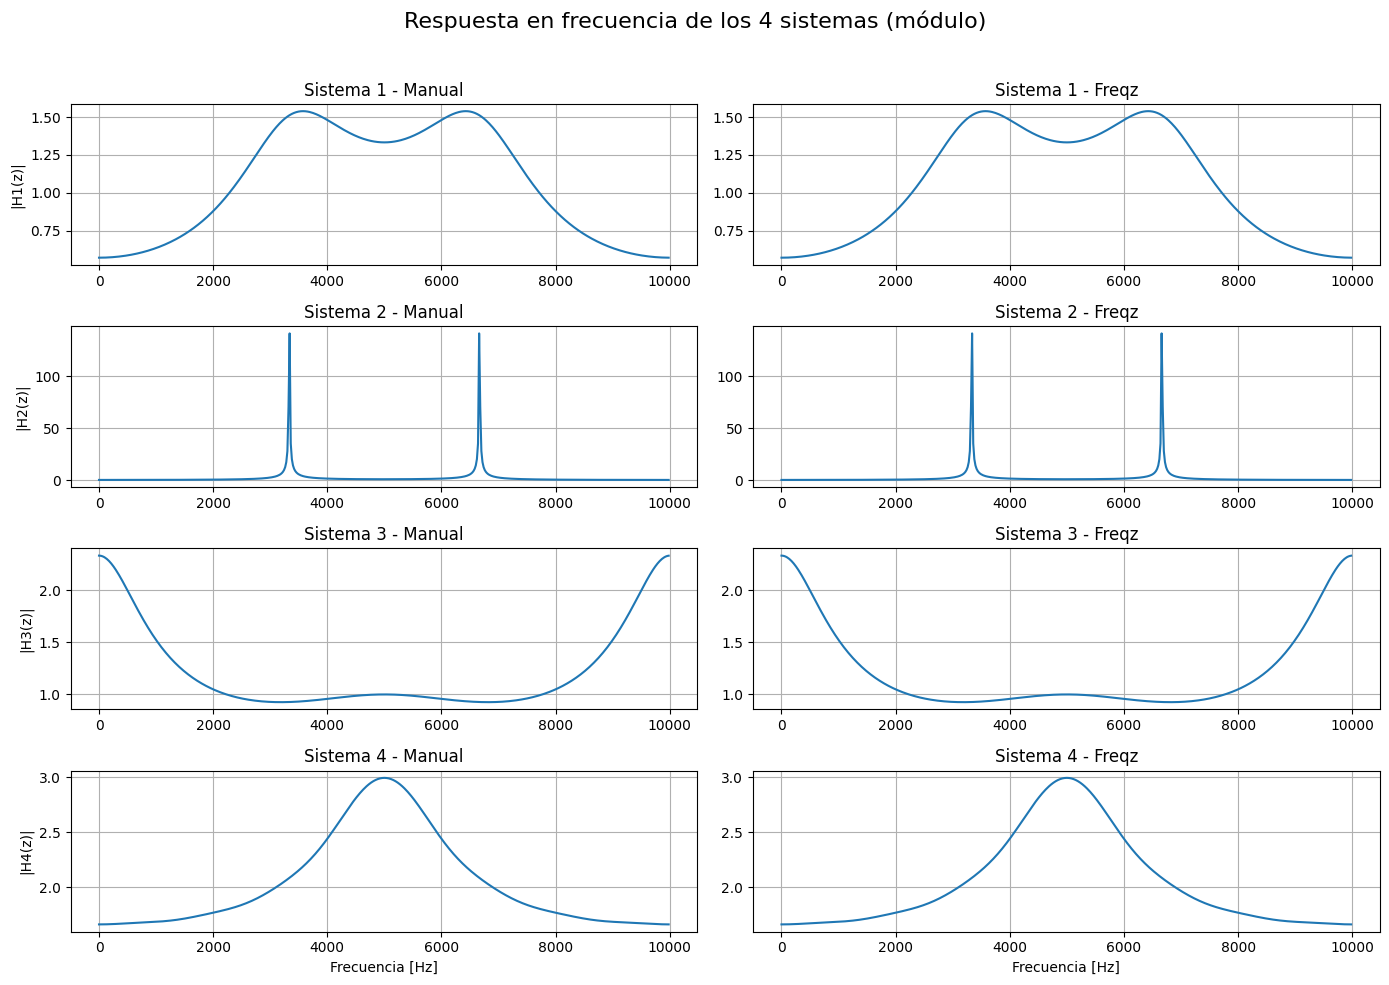

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as spy

# ----- Definición de funciones H(z) -----

def H1(z):
    return (z**2) / (z**2 - (1/2)*z + 1/4)

def H2(z):
    return z / (z**2 - z + 1)

def H3(z):
    return (7 * z**2) / (z**2 - 2*z - 6)

def H4(z):
    H = 2
    coef = [2]
    for i in range(7):
        H += np.power(1/(2*z), i+1)
        coef.append(np.power(1/2, i+1))
    return H, coef

# ----- Parámetros generales -----

fm = 10000       # Frecuencia de muestreo (Hz)
N = 512          # Cantidad de puntos
omega = np.linspace(0, 2*np.pi, N, endpoint=False)
frecs = np.linspace(0, fm, N, endpoint=False)
ejw = np.exp(1j * omega)  # z = e^{jω}

# ----- Crear subplots -----

fig, axs = plt.subplots(4, 2, figsize=(14, 10))
fig.suptitle('Respuesta en frecuencia de los 4 sistemas (módulo)', fontsize=16)

# ----------- Sistema 1 -----------

respuesta1 = np.abs(np.fft.fftshift(H1(ejw)))
w1, h1 = spy.freqz([0,0,1], [1/4,-1/2,1], whole=True, worN=N)
respuesta1_freqz = np.abs(np.fft.fftshift(h1))

axs[0, 0].plot(frecs, respuesta1)
axs[0, 0].set_title("Sistema 1 - Manual")
axs[0, 0].set_ylabel("|H1(z)|")
axs[0, 0].grid()

axs[0, 1].plot(frecs, respuesta1_freqz)
axs[0, 1].set_title("Sistema 1 - Freqz")
axs[0, 1].grid()

# ----------- Sistema 2 -----------

respuesta2 = np.abs(np.fft.fftshift(H2(ejw)))
w2, h2 = spy.freqz([0, 1], [1, -1, 1], whole=True, worN=N)
respuesta2_freqz = np.abs(np.fft.fftshift(h2))

axs[1, 0].plot(frecs, respuesta2)
axs[1, 0].set_title("Sistema 2 - Manual")
axs[1, 0].set_ylabel("|H2(z)|")
axs[1, 0].grid()

axs[1, 1].plot(frecs, respuesta2_freqz)
axs[1, 1].set_title("Sistema 2 - Freqz")
axs[1, 1].grid()

# ----------- Sistema 3 -----------

respuesta3 = np.abs(np.fft.fftshift(H3(ejw)))
w3, h3 = spy.freqz([7], [1, -2,-6], whole=True, worN=N)
respuesta3_freqz = np.abs(np.fft.fftshift(h3))

axs[2, 0].plot(frecs, respuesta3)
axs[2, 0].set_title("Sistema 3 - Manual")
axs[2, 0].set_ylabel("|H3(z)|")
axs[2, 0].grid()

axs[2, 1].plot(frecs, respuesta3_freqz)
axs[2, 1].set_title("Sistema 3 - Freqz")
axs[2, 1].grid()

# ----------- Sistema 4 -----------

respuesta4, coef = H4(ejw)
respuesta4 = np.abs(np.fft.fftshift(respuesta4))
w4, h4 = spy.freqz(coef, [1], whole=True, worN=N)
respuesta4_freqz = np.abs(np.fft.fftshift(h4))

axs[3, 0].plot(frecs, respuesta4)
axs[3, 0].set_title("Sistema 4 - Manual")
axs[3, 0].set_ylabel("|H4(z)|")
axs[3, 0].grid()

axs[3, 1].plot(frecs, respuesta4_freqz)
axs[3, 1].set_title("Sistema 4 - Freqz")
axs[3, 1].grid()

# Etiquetas del eje x
for ax in axs[-1, :]:
    ax.set_xlabel("Frecuencia [Hz]")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Ejercicio 3
Considere el sistema
$$ H(z) = \frac{1 - 2z^{-1} + 2z^{-2} - z^{-3}}{(1-z^{-1})(1-0.5z^{-1})(1-0.2z^{-1})}$$

1. Dibuje el diagrama de polos y ceros. ¿Es estable el sistema?
    *Un sistema discreto es estable si todos los polos estan dentro del circulo unitarios, es decir, si su modulo es menor que uno. En este caso hay un polo que esta SOBRE el circulo unitario, por lo tanto no es estable.*
2. Determine la respuesta al impulso del sistema.
    *La respuesta al impulso se obtiene aplicando la transformada inversa de Z, en este caso `dimpulse` lo hace directamente y muestra
    - Como responde el sistema ante una entrada impulso
    - Si crece, decae o se mantiene constante*


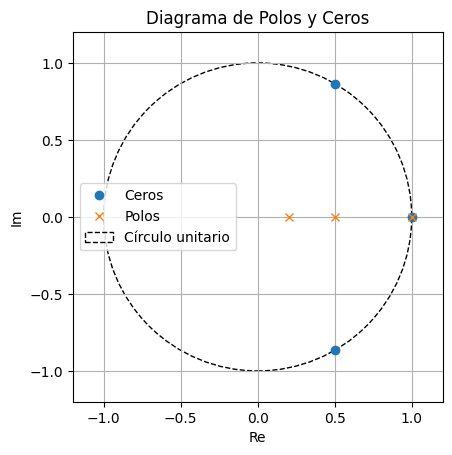

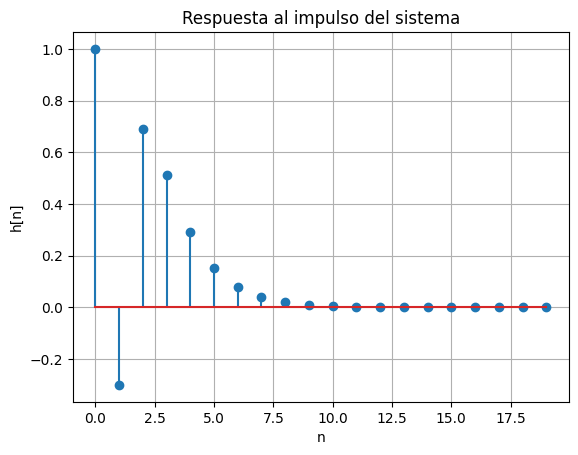

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal

num = [1, -2, 2, -1]
den = [1, -1.7, 0.8, -0.1]

# 1. Polos y ceros
z,p,_ = signal.tf2zpk(num,den)

# Diagrama de polos y ceros
fig, ax = plt.subplots()
ax.plot(np.real(z), np.imag(z), 'o', label='Ceros')
ax.plot(np.real(p), np.imag(p), 'x', label='Polos')
circle = plt.Circle((0, 0), 1, color='black', fill=False, linestyle='--', label='Círculo unitario')
ax.add_artist(circle)
ax.set_xlabel('Re')
ax.set_ylabel('Im')
ax.set_title('Diagrama de Polos y Ceros')
ax.grid()
ax.legend()
ax.set_aspect('equal')
ax.set_xlim(-1.2, 1.2)
ax.set_ylim(-1.2, 1.2)

# 2. Respuesta al impulso
n, h = signal.dimpulse((num, den, 1), n=20)
h = np.squeeze(h)

plt.figure()
plt.stem(n, h)
plt.title("Respuesta al impulso del sistema")
plt.xlabel("n")
plt.ylabel("h[n]")
plt.grid()
plt.show()

# Ejercicio 4
Considere el sistema continuo

$$ H(s) = \frac{12500 s}{44s^2 + 60625s + 62510^4} $$

y obtenga la funcion de transferencia $H(z)$ del sistema discreto correspondiente, mediante la utilizacion de transformaciones conformes de Euler y Bilineal. Para ello
1. Determine la frecuencia de corte del sistema continuo (frecuencia donde cae 3dB respecto al valor maximo) y utilice, para aplicar las transformaciones conformes, una frecuencia de muestreo cuatro veces superior a esta.
2. Analice la respuesta en frecuencia de los dos sistemas discretos obtenidos y comparelas con la del sistema continuo. Determine si la frecuencia de muestreo empleada permite obtener la respuesta esperada mediante ambas transformaciones conformes

No podriamos usar $z = \frac{ln(z)}{T}$ ya que nos queda en terminos no polinomiales por lo que hay que aplicar transformaciones conformes -> Bilineal y Euler.

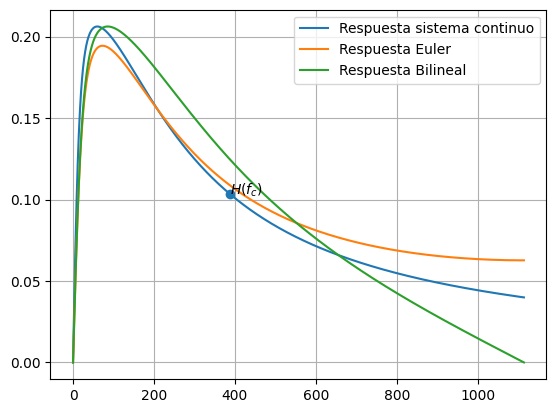

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as spy

pi = np.pi

# Frecuencia angular del sistema continuo (rango de 0 a 7000 rad/s)
w = np.arange(0, 7000, 1)

# Convertimos a frecuencia en Hz
frecuencias = w / (2 * pi)

# Variable compleja de Laplace (s = jω)
s = 1j * w

# Función de transferencia del sistema continuo H(s)
H_s = (12500 * s) / (44 * s**2 + 60625 * s + 625 * 10**4)

# ===========================
# Paso 1: Frecuencia de corte
# ===========================

# Frecuencia de corte ≈ cuando |H(f)| cae al 70.7% (≈ 3 dB) del valor máximo
# (esto equivale a la mitad en potencia → 1/√2 ≈ 0.707)
# Buscamos el índice donde la respuesta se acerca a ese valor (±1e-3)
indiceFc = np.where(np.isclose(np.abs(H_s), max(np.abs(H_s)) / np.sqrt(2), atol=1e-3))[0][0]

# Frecuencia de corte (en Hz)
fc = frecuencias[indiceFc]

# ===============================
# Paso 2: Frecuencia de muestreo
# ===============================

# Elegimos la frecuencia de muestreo 4 veces la de corte para evitar aliasing
fm = 4 * fc
T = 1 / fm  # Período de muestreo

# ===============================
# Paso 3: Transformadas conformes
# ===============================

# Creamos un vector omega para representar la frecuencia digital (0 a π)
omega = np.arange(0, pi, pi / len(w))
z = np.exp(1j * omega)  # z = e^{jω}

# Bilineal: s = (2/T)(1 - z^{-1}) / (1 + z^{-1})
s_bilineal = (2 / T) * (1 - 1 / z) / (1 + 1 / z)

# Evaluamos H(s) usando s_bilineal
H_bilineal = (12500 * s_bilineal) / (44 * s_bilineal**2 + 60625 * s_bilineal + 625 * 10**4)

# Euler hacia atrás: s = (1 - z^{-1}) / T
s_euler = (1 - 1 / z) / T

# Evaluamos H(s) con sustitución de Euler
H_euler = (12500 * s_euler) / (44 * s_euler**2 + 60625 * s_euler + 625 * 10**4)

# ===============================
# Paso 4: Gráfica de resultados
# ===============================

# Magnitud de las respuestas (en función de la frecuencia analógica original)
plt.plot(frecuencias, np.abs(H_s), label='Respuesta sistema continuo')
plt.plot(frecuencias, np.abs(H_euler), label='Respuesta Euler')
plt.plot(frecuencias, np.abs(H_bilineal), label='Respuesta Bilineal')

# Señalamos la frecuencia de corte sobre H(s)
plt.scatter(frecuencias[indiceFc], np.abs(H_s[indiceFc]), color='red')
plt.annotate('$H(f_c)$', (fc, np.abs(H_s[indiceFc])))

# Decoración del gráfico
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('|H(f)|')
plt.title('Comparación entre el sistema continuo y discretizaciones')
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()
